In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('fcc-forum-pageviews.csv')
df.head(10)
DF = 'fcc-forum-pageviews.csv'
DF.head()

AttributeError: 'str' object has no attribute 'head'

In [3]:
#df=df[df['value']>= df['value'].quantile(0.025)] 
#df.info()
#EXPLICACION CHATGPT
#df: Representa un DataFrame, una estructura de datos bidimensional en pandas utilizado para almacenar y manipular datos tabulares.

#df['value']: Indexación de columna en el DataFrame df. Esto accede a la columna llamada 'value'.

#df['value'].quantile(0.025): Calcula el percentil 2.5 (o el cuantil 0.025) de los valores en la columna 'value'. 
#Esto significa que estás calculando un valor en el que el 2.5% de los valores en la columna 'value' están por debajo de él.

#df['value'] >= df['value'].quantile(0.025): Esta es la condición de filtrado. Estás comparando cada valor en la columna 'value' con el percentil 2.5 calculado anteriormente. 
#Si un valor en la columna 'value' es mayor o igual al percentil 2.5, la condición será verdadera (True) para esa fila y la fila se mantendrá en el DataFrame resultante.

In [4]:
#df=df[df['value'] <= df['value'].quantile(0.975)]
#df.info()
#df['value'] <= df['value'].quantile(0.975): Esta es la condición de filtrado. Estás comparando cada valor en la columna 'value' con el percentil 97.5 calculado anteriormente. Si un valor en la columna 'value' es menor o igual al percentil 97.5, la condición será verdadera (True) para esa fila y la fila se mantendrá en el DataFrame resultante.

In [5]:
#print(df.describe())
#df.info()
#t=df[df['value']>= df['value'].quantile(0.025)]
#t.info()
# ENUNCIADO
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df=df[(df['value']>= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


<AxesSubplot:>

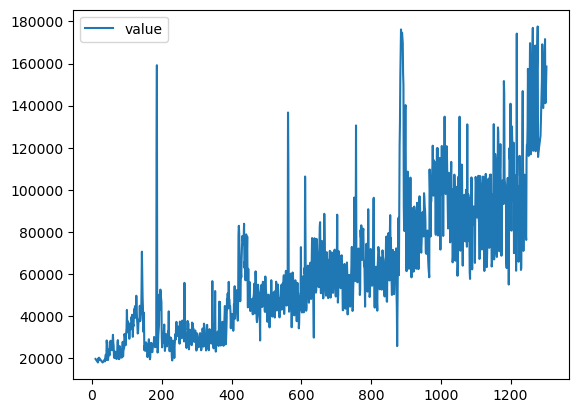

In [6]:
df.plot()

<AxesSubplot:xlabel='date'>

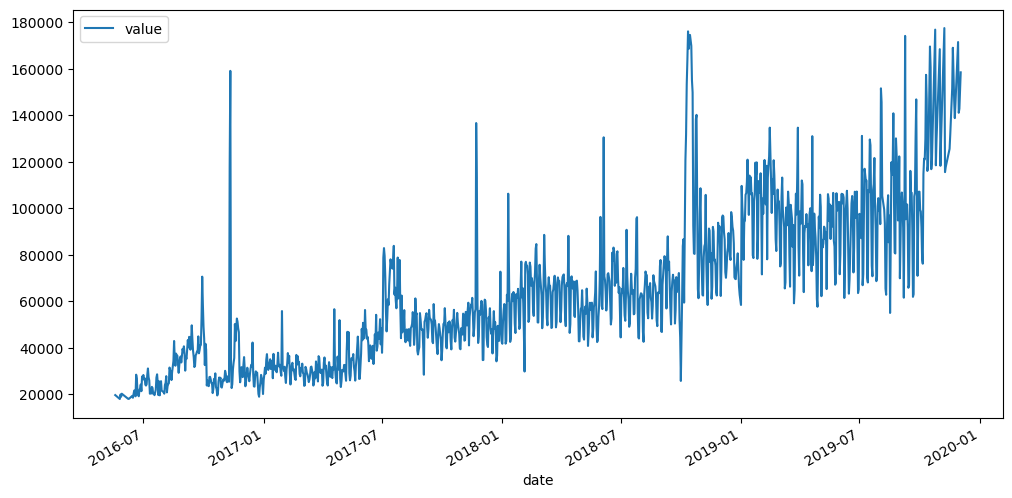

In [7]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot(figsize=(12,6))

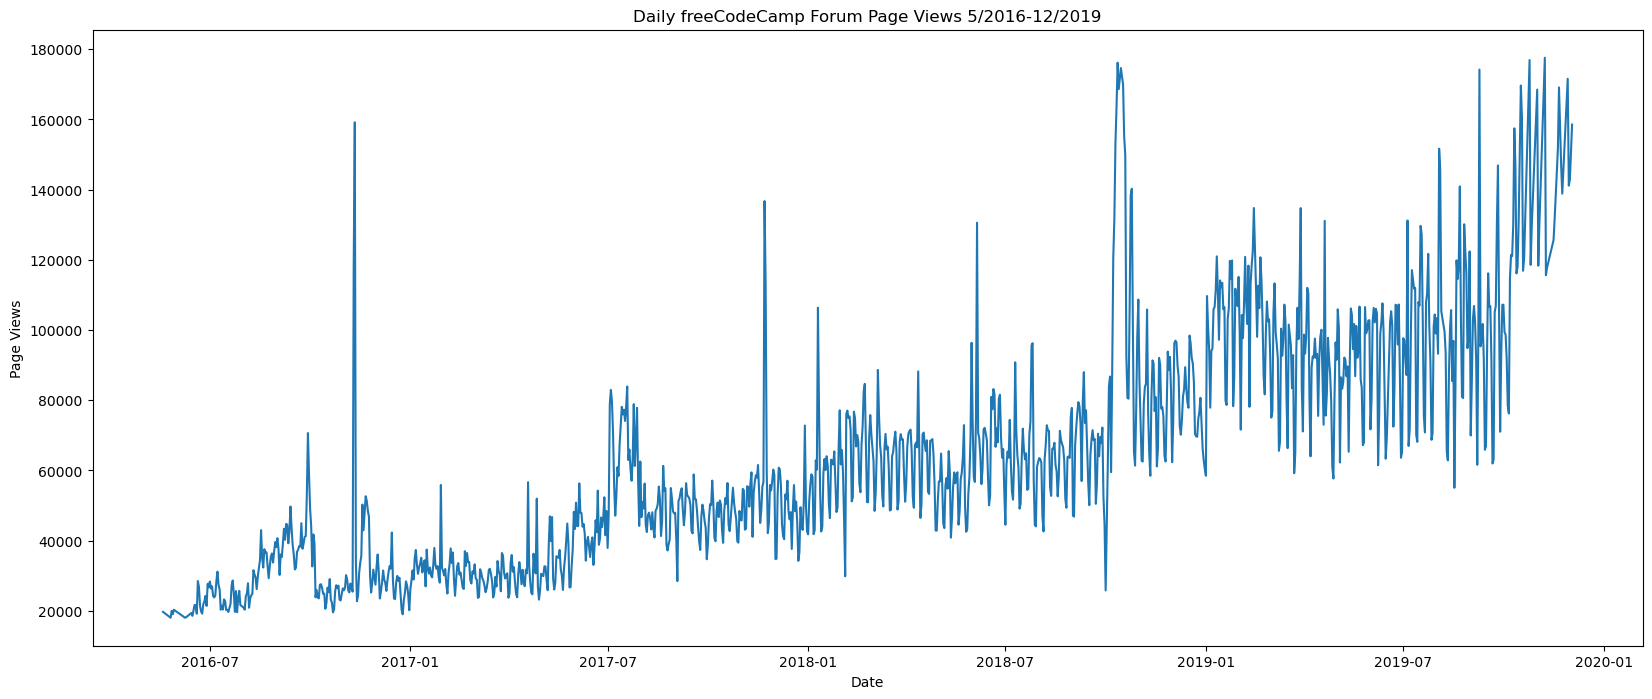

In [8]:
plt.figure(figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.plot(df.index,df['value'])


In [9]:
#DF=pd.read_csv('fcc-forum-pageviews.csv',index_col=0,parse_dates=True)
#DF.head(10)
#plt.plot(DF.index,DF['value'])
#plt.figure(figsize=(12,6))

In [10]:
df=df.reset_index()


In [11]:
#df.resample('M').sum()
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df
#df_months=df.groupby(df['month']).mean()


,date,value,month,year
0,2016-05-19,19736,5,2016
1,2016-05-26,18060,5,2016
2,2016-05-27,19997,5,2016
3,2016-05-28,19044,5,2016
4,2016-05-29,20325,5,2016
...,...,...,...,...
1233,2019-11-24,138875,11,2019
1234,2019-11-29,171584,11,2019
1235,2019-11-30,141161,11,2019
1236,2019-12-01,142918,12,2019


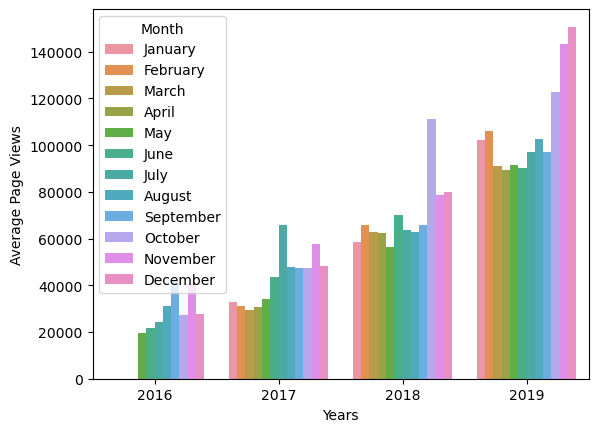

In [12]:
g=sns.barplot(x='year',y='value',hue='month',data=df,ci=None)
#sns.histplot(x='year',y='value',hue='month',data=df)
#g.set_axis_labels('Years','Average Page Views')
g.set_ylabel('Average Page Views')
g.set_xlabel('Years')
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],title='Month')


In [13]:
# rr=df.groupby(['year', 'month'])['value'].sum().reset_index()
#tt=rr.groupby(['year','month']).sum()
#tt#sns.barplot(x='year',y='value',data=df)

value
year month         
2016 5        97162
     6       415627
     7       675071
     8       962525
     9      1244306
     10      849348
     11     1213459
     12      862805
2017 1      1016340
     2       871166
     3       910442
     4       926362
     5      1061573
     6      1307325
     7      2040012
     8      1479086
     9      1421304
     10     1470600
     11     1731047
     12     1501038
2018 1      1815983
     2      1839012
     3      1943507
     4      1870525
     5      1753449
     6      2103510
     7      1971323
     8      1947780
     9      1978252
     10     3118588
     11     2360650
     12     2481472
2019 1      3163752
     2      2967114
     3      2827649
     4      2681053
     5      2834637
     6      2532198
     7      2917097
     8      2978802
     9      2918065
     10     2701650
     11     2004330
     12      301467

In [18]:
df_box = df.copy()
df_box.reset_index(inplace=True) 
#Inplace=True: Este argumento le dice a pandas que realice la operación en el lugar, es decir, que modifique el DataFrame original (df_box) en lugar de crear uno nuevo. Si inplace se omite o se establece en False, la función reset_index devolvería un nuevo DataFrame con el índice restablecido, pero no modificaría df_box original.
df_box['year'] = [d.year for d in df_box.date]
#df_box['year']: Esto crea una nueva columna llamada "year" en el DataFrame df_box.
#[d.year for d in df_box.date]: Esta es una comprensión de lista que itera a través de cada elemento de la columna "date" en el DataFrame df_box (presumiblemente, la columna "date" contiene objetos de fecha). Para cada fecha en la columna "date", se extrae el año utilizando el método year que es parte de la clase de fecha en Python. El resultado es una lista de años correspondientes a las fechas en la columna "date".
df_box['month'] = [d.strftime('%b') for d in df_box.date]
#df_box['month']: Esto crea una nueva columna llamada "month" en el DataFrame df_box.
#[d.strftime('%b') for d in df_box.date]: Esta es una comprensión de lista que itera a través de cada elemento de la columna "date" en el DataFrame df_box (presumiblemente, la columna "date" contiene objetos de fecha). Para cada fecha en la columna "date", se utiliza el método strftime('%b') para formatear la fecha y extraer la representación abreviada del mes. El formato %b se utiliza para obtener el nombre del mes en formato abreviado (por ejemplo, "Jan" para enero, "Feb" para febrero, etc.).


,index,date,value,month,year
0,0,2016-05-19,19736,May,2016
1,1,2016-05-26,18060,May,2016
2,2,2016-05-27,19997,May,2016
3,3,2016-05-28,19044,May,2016
4,4,2016-05-29,20325,May,2016
...,...,...,...,...,...
1233,1233,2019-11-24,138875,Nov,2019
1234,1234,2019-11-29,171584,Nov,2019
1235,1235,2019-11-30,141161,Nov,2019
1236,1236,2019-12-01,142918,Dec,2019


Text(0, 0.5, 'Page Views')

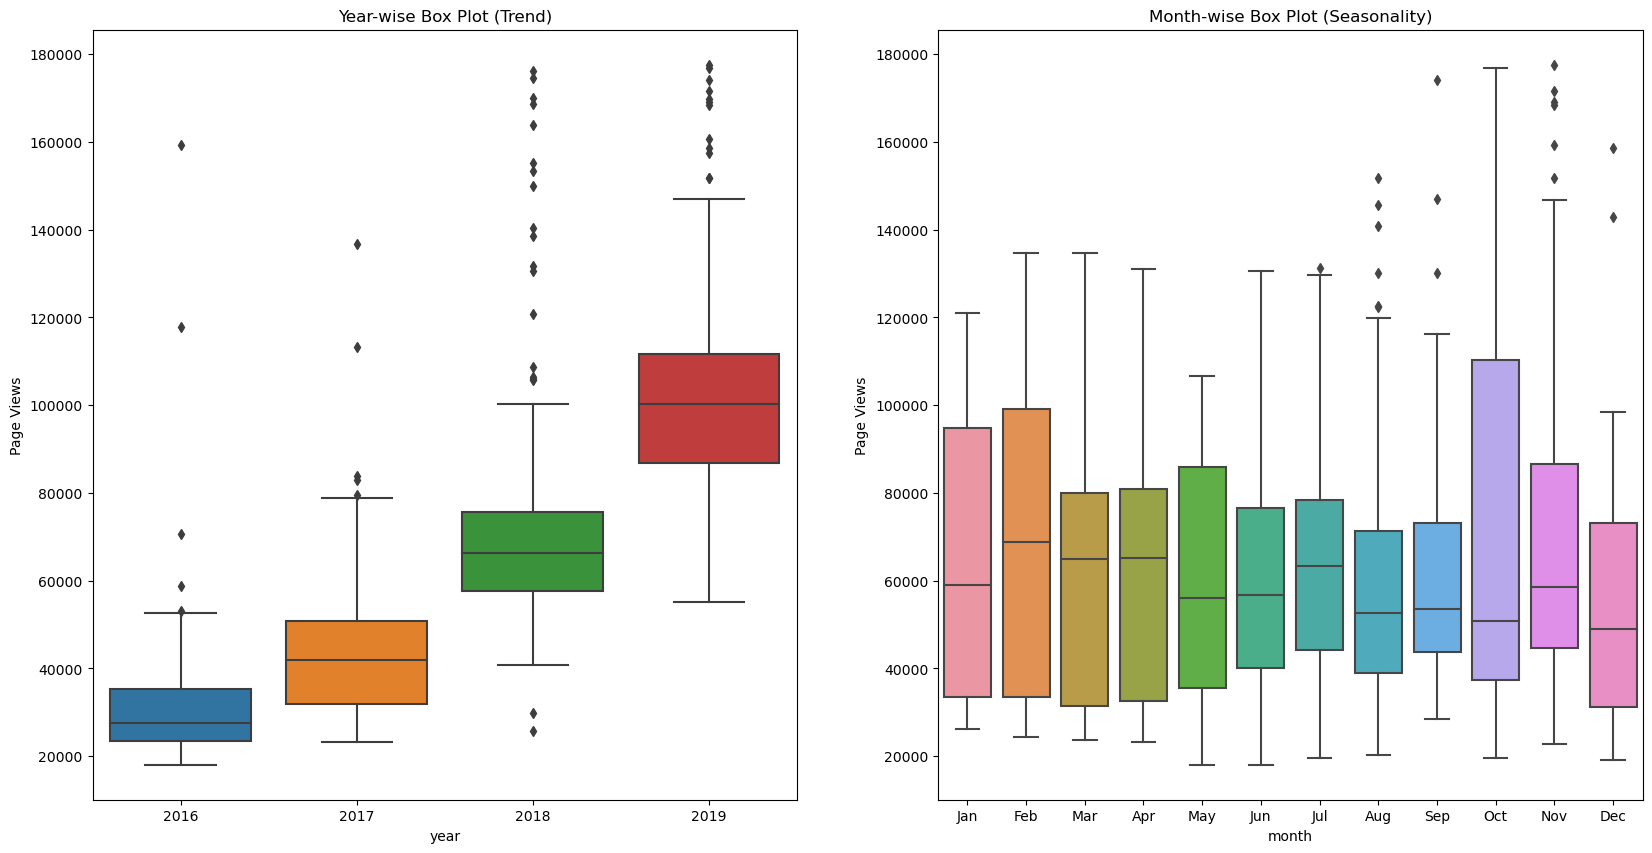

In [60]:
 # Draw box plots (using Seaborn)



<AxesSubplot:xlabel='year', ylabel='value'>

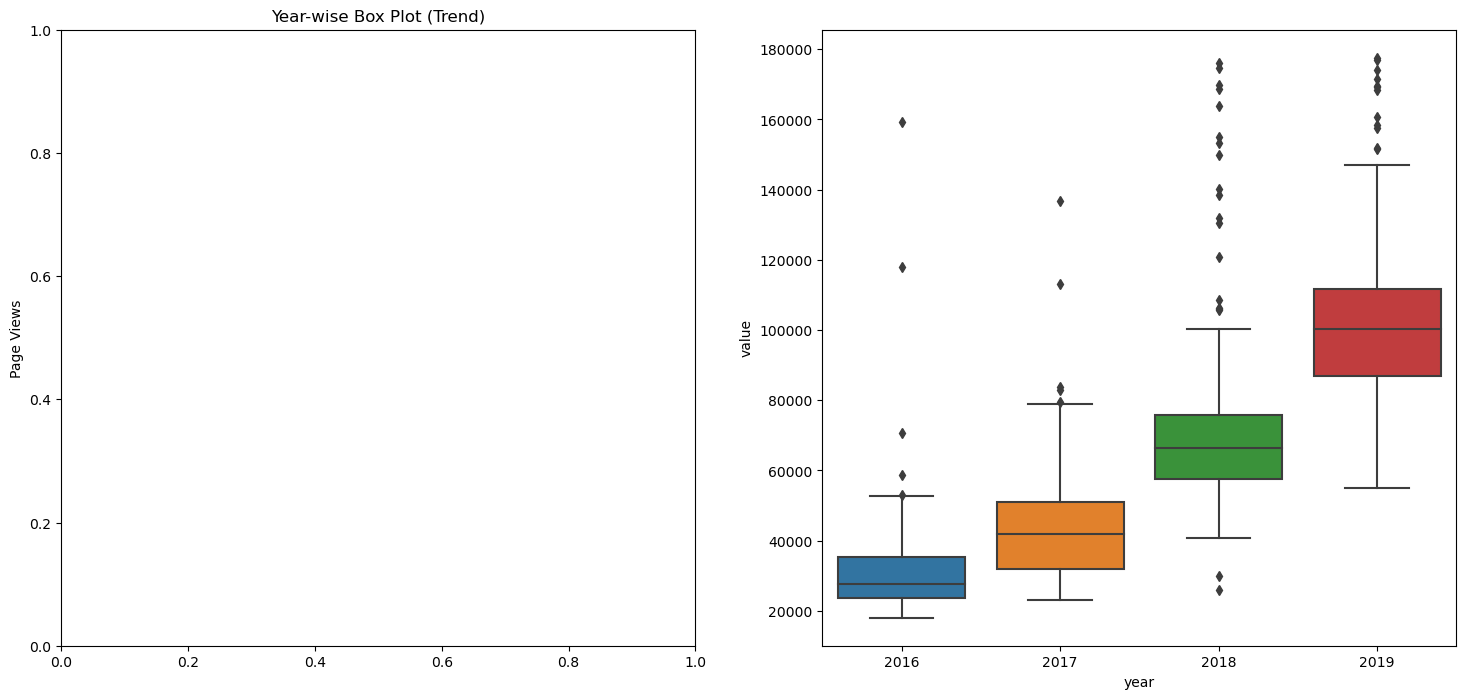